## Review on basic Python data visualziation and data summary 

### Goal for today： 

- Review on basic data structure
- Understand basic rules to choose figure type
- Learn how to describe data and simple figures 
- Review basic plotting options in Python (matplotlib and seaborn)


### Describing a data set

In a data table (also called ``data matrix"), like the one below. There are two dimensions in the data: 

- Observations: each individual subject, case, or sample point (rows, represented with $n$)
- Variables/Feature: characteristics that are recorded for each subject in the sample (columns, represented with $p$)


In [112]:
#pip install pandas matplotlib seaborn

In [113]:
import pandas as pd

df = pd.read_csv('ICUAdmissions.csv')
df['Status'] = df['Status'].map({0: 'survived', 1: 'dead'})
df.head()


,ID,Status,Age,Sex,Race,Service,Cancer,Renal,Infection,CPR,...,HeartRate,Previous,Type,Fracture,PO2,PH,PCO2,Bicarbonate,Creatinine,Consciousness
0,8,survived,27,1,1,0,0,0,1,0,...,88,0,1,0,0,0,0,0,0,1
1,12,survived,59,0,1,0,0,0,0,0,...,80,1,1,0,0,0,0,0,0,1
2,14,survived,77,0,1,1,0,0,0,0,...,70,0,0,0,0,0,0,0,0,1
3,28,survived,54,0,1,0,0,0,1,0,...,103,0,1,1,0,0,0,0,0,1
4,32,survived,87,1,1,1,0,0,1,0,...,154,1,1,0,0,0,0,0,0,1


### Describing variables

There are at least two ways to describe variables:
		
By value type:
		
- Numerical variables: take on numerical values with meaning Mathematical operations like addition, etc. must make sense
- Categorical variables: take on names, categories, or labels Categories are sometimes represented by numbers...

By function:
		
- Response variable/Target: defined by the particular research question a study seeks to address, and measures the outcome of interest in the study
- Explanatory variable/Feature: a secondary variable(s) that explains changes in the response variable

### Important terminology clarification

- feature
- variable
- attribute

### In-class activities

Suppose my research question is "What factors may be related to the heart rate in ICU admissions?" Try to make three data viasualizations. 

Things you need to decide: 
- What features I want to choose for the data visualizaiton?
- What type of figures I will choose? 
- What information I want to achieve from the data visualization?
- ......


In [114]:
# Example 1: 

In [115]:
# Example 2: 

In [116]:
# Example 3: 

### Basic data visualization choices

Here is a general guidline for the type of plots: 

- One categorical: bar plot
- One continous: histogram/density plot/boxplot
- Two continous: scatter plot
- One categorical and one continous: side-by-side boxplot
- Two categorical: side-by-side bar plot 

#### One categorical: bar plot

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

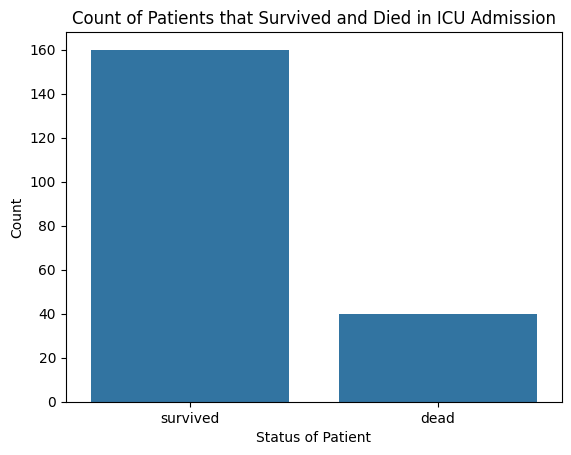

In [118]:
sns.countplot(x="Status", data= df)

plt.title("Count of Patients that Survived and Died in ICU Admission")
plt.xlabel("Status of Patient")
plt.ylabel("Count")
plt.show()

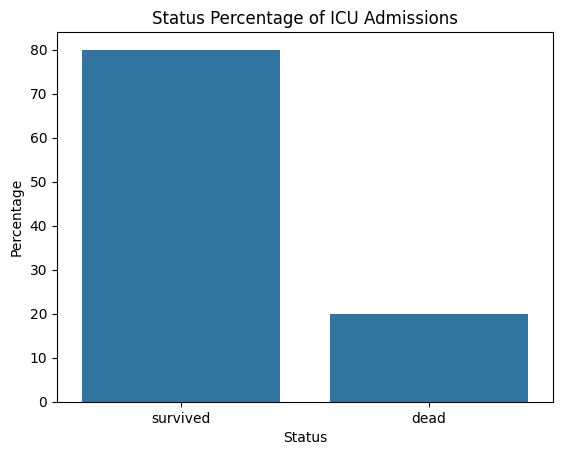

In [119]:
# normalize = True)*100 
# ^^adding this will give you percentage!!

status_counts = df['Status'].value_counts(normalize = True)*100
status_counts

# now making a bar plot based on the little data frame we made with the status counts
sns.barplot(x = status_counts.index, y = status_counts.values)
plt.xlabel('Status')
plt.ylabel('Percentage')
plt.title('Status Percentage of ICU Admissions')
plt.show()

In [120]:

# Display the percentage values above the bars (optional)
#for i, value in enumerate(status_counts.values):
#    plt.text(i, value + 1, f'{value:.2f}%', ha='center')
#plt.show()

##### What to write about a bar plot



- what is this plot? (what features?)
- Percentage/count for each bar
- is there clear difference on the percentage/count

  The figure is about the number of people who survived in ICU Admissions. Among the 200 patients, 40 of them died in the ICU while the other 160 survived.The difference is clear between the groups.

#### One continous: histogram/density plot/boxplot

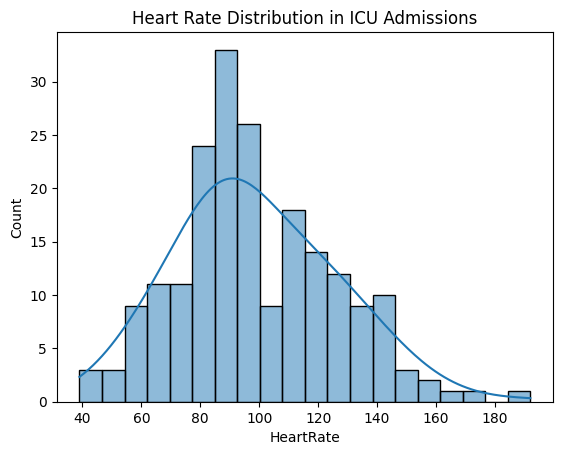

In [121]:
# KDE brings up the line. if you do KDE = True it makes a basic line, KDE_KWS will give you more control

sns.histplot(df['HeartRate'], bins = 20, kde = True, kde_kws = {'bw_method' : .5})
plt.title('Heart Rate Distribution in ICU Admissions')
plt.show()

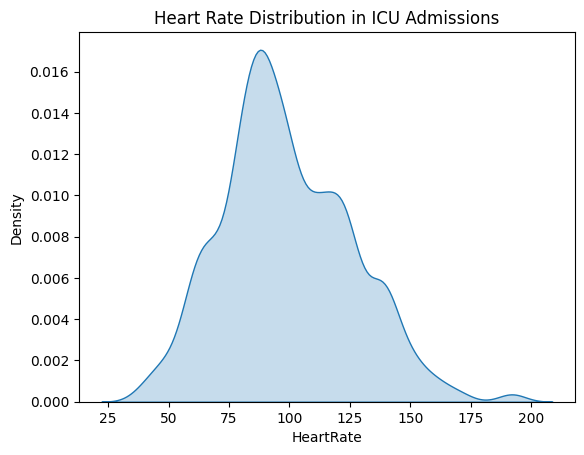

In [122]:
sns.kdeplot(df['HeartRate'], bw_adjust = .6, fill = True)
plt.title('Heart Rate Distribution in ICU Admissions')
plt.show()

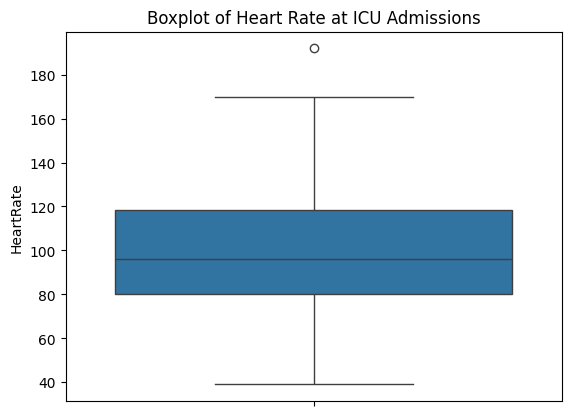

In [123]:
sns.boxplot(data = df, y = 'HeartRate')
plt.title('Boxplot of Heart Rate at ICU Admissions')
plt.show()

##### Difference between histogram/density plot/ boxplot

- Histogram and density plot emphasizes on the distribution (shape) of the data
- Boxplot emphasizes the statistics of the data (median, IQR)
- Boxplot cannot catch the distribution information, like bi-mode
- Histogram needs to choose the bin number and density plot needs to choose the bandwidth

##### Difference between histogram and bar plot

- Histogram is for the continuous variable while bar plot is for the categorical variable
- histogram is almost always vertical but barplot can be horizontal
- histogram usually does not have spaces between bars while bar plot can have spaces
- histogram's bar cannot change the order but bar plot can (numerical vs categorical)

##### What to write about a histogram/density plot

- shape (skewness and mode)
- majority of the data (typical value = mean $\pm$ sd)
- potential outlier

<img src="https://www.biologyforlife.com/uploads/2/2/3/9/22392738/c101b0da6ea1a0dab31f80d9963b0368_orig.png" width="700" height="300">

The figure is the distribution of heart rate in icue admission. the heart rate has a uni-mode but it is slightly skewed to the right, which means it may have a potential outlier with large value. the typical value is within the range 98.9 $\pm$ 26.8.

##### What to write about a box plot

- can comment on skewness but not shape
- majority of the data (IQR)
- potential otulier

this figure is the boxplot of the heartrate in ICU admissions. in the figure , the heart rate nay still have skewness to the rught. the IQR is 80 - 118.25. there might exist an outlier with a higher value.

#### Two continous: scatter plot

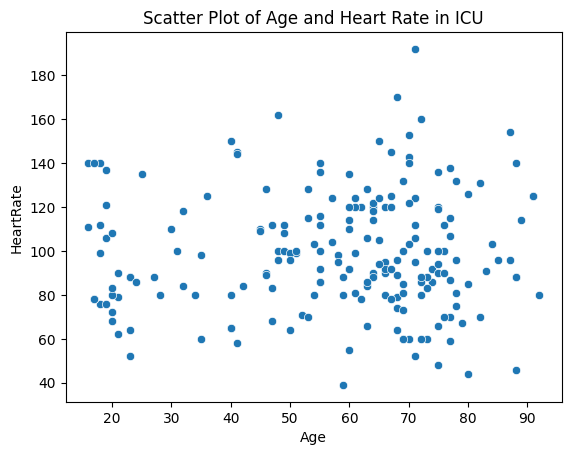

In [124]:
sns.scatterplot(x = 'Age', y = 'HeartRate', data = df)
plt.title('Scatter Plot of Age and Heart Rate in ICU')
plt.show()

##### What to write about a scatter plot

- Trend (linear, non-linear, no trend)
- outlier (if any)
- clusters (if any)

  The figure is the scatter plot between age and heart rate in ICU. it seems that there is no clear trend in the figure and no outlier or clusters.


#### Some bad example of the scatter plot

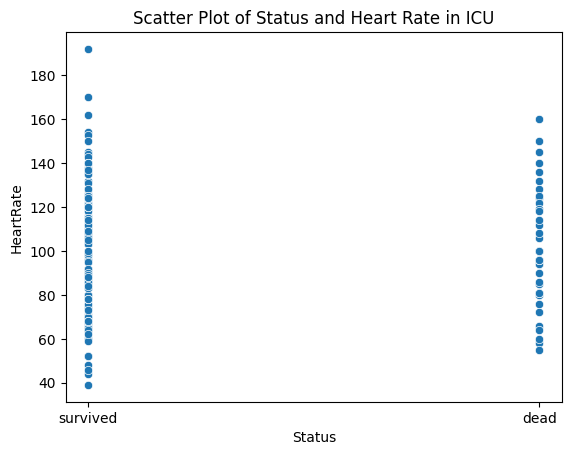

In [125]:
sns.scatterplot(x = 'Status', y = 'HeartRate', data = df)
plt.title('Scatter Plot of Status and Heart Rate in ICU')
plt.show()

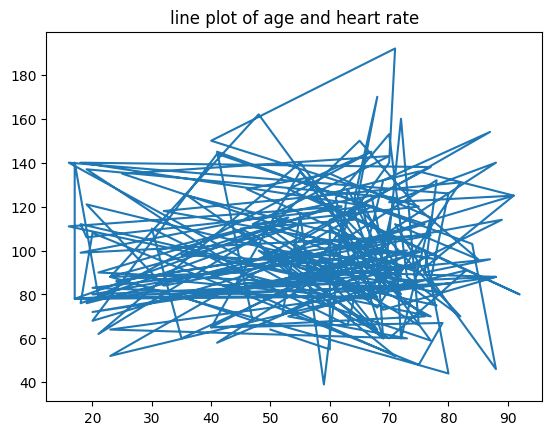

In [126]:
plt.plot(df['Age'], df['HeartRate'])
plt.title('line plot of age and heart rate')
plt.show()

#### One categorical and one continous: side-by-side boxplot

Other choices include side-by-side density plot

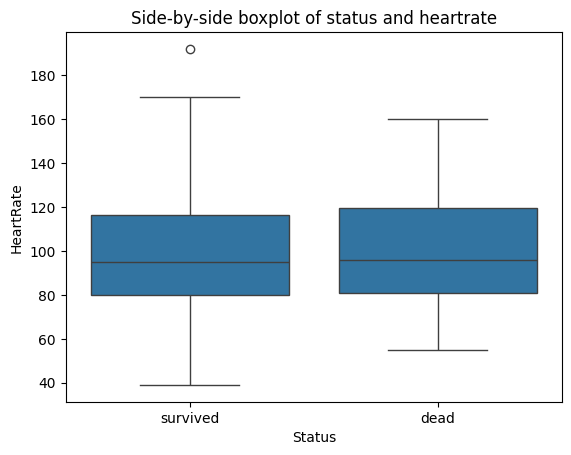

In [127]:
sns.boxplot(x = 'Status', y = 'HeartRate', data = df)
plt.title('Side-by-side boxplot of status and heartrate')
plt.show()

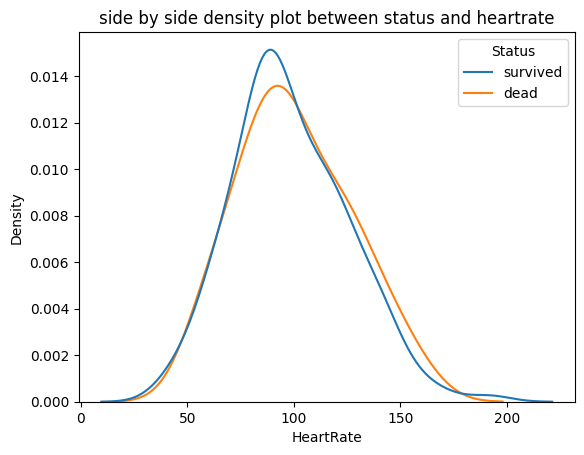

In [128]:
#common_norm will give a more fair comparison. it will make the groups even and assume similar sample size

sns.kdeplot(x = 'HeartRate', hue = 'Status', data = df, common_norm = False,)
plt.title('side by side density plot between status and heartrate')
plt.show()

##### What to write about a side-by-side boxplot or density plot

- highlight the group comparison
- for boxplot declare whether the boxes overlap

boxplot: figure is side by side boxplot between status and heartrate in icu. in the figure the boxes between the two groups overlap, which means we can't claim a statistical significant difference between the two different groups.


#### Two categorical: side-by-side bar plot

In [129]:
# mapping the data to words instead of 1 and 0
df["CPR"] = df['CPR'].map({0 : 'no', 1 : 'yes'})

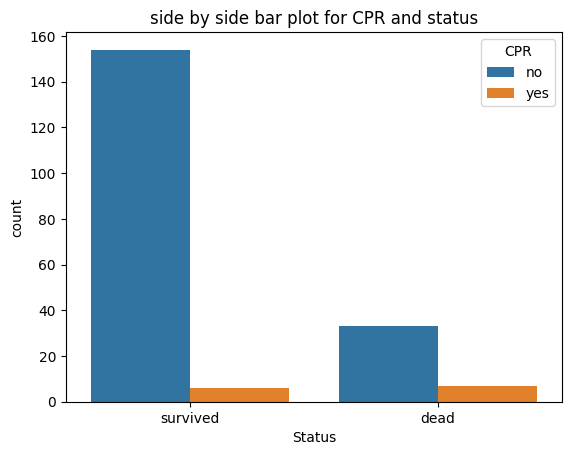

In [130]:
sns.countplot(x = 'Status', hue = "CPR", data = df)
plt.title('side by side bar plot for CPR and status')
plt.show()

In [131]:
# normalizing to ALL will make ALL the data added together equal to 1
# normalizing to INDEX will make the data in the ROWS added together equal to 1
# normalizing to COLUMNS will make the data in the COLUMNS added together equal to 1
proportion_table = pd.crosstab(df['Status'], df['CPR'])
#proportion_table = pd.crosstab(df['Status'], df['CPR'], normalize = 'all')
proportion_table = pd.crosstab(df['Status'], df['CPR'], normalize = 'index')
#proportion_table = pd.crosstab(df['Status'], df['CPR'], normalize = 'columns')
proportion_table

CPR,no,yes
Status,,
dead,0.8250,0.1750
survived,0.9625,0.0375


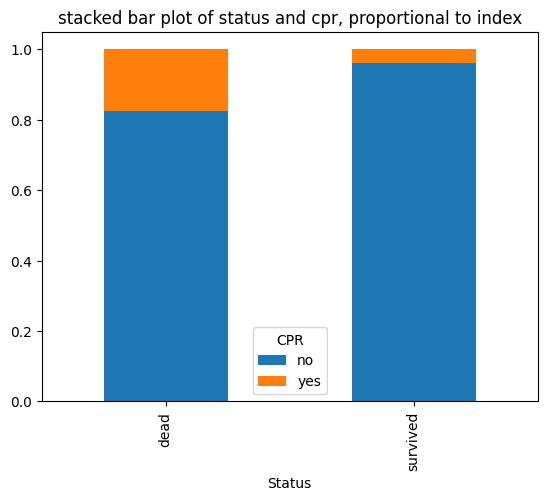

In [132]:
proportion_table.plot(kind= 'bar', stacked = True)
plt.title('stacked bar plot of status and cpr, proportional to index')
plt.show()

##### What to write about a side-by-side bar plot

- highlight differences

  Stacled bar plot: the figure is stacked bar plot of cpr use across surviving and non surviving groups. in the figure the distribution of cpr is different for surviving and non surviving groups. in survival group there is a much larger proportiob of patient not using cpr while in non surviving there is a smaller proportion of difference in cpr use. there might be a relation between cpr use and the different groups.

### In-class activities: Try to make data visualizaiton by yourself

See the data with about Titanic. Try to make three data visualization to study how other features affect the "survived" (whether the person survived from the Titanic disaster). Once you finish, show your figures to the neighbors and describe the figures to them. 

Note: This is not a complete data, feel free to remove the missing valuesv(or do any other data pre-processing) before you making the plots. 

In [133]:
titanic_data = sns.load_dataset('titanic')
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


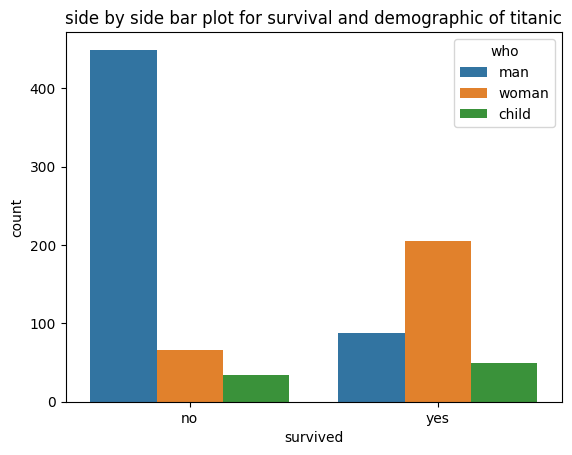

In [134]:
# mapping the data to words instead of 1 and 0
titanic_data["survived"] = titanic_data['survived'].map({0 : 'no', 1 : 'yes'})

sns.countplot(x = 'survived', hue = "who", data = titanic_data)
plt.title('side by side bar plot for survival and demographic of titanic')
plt.show()

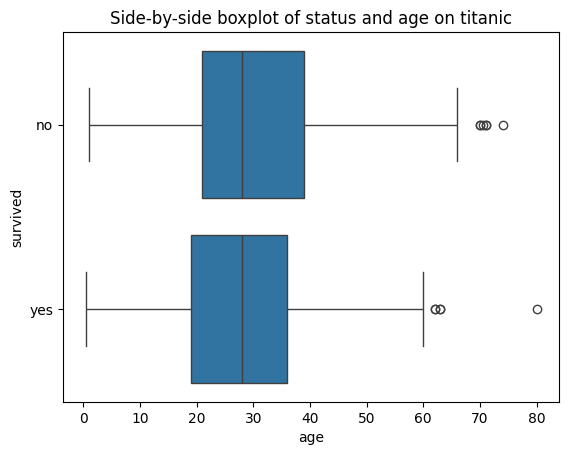

In [142]:
sns.boxplot(x = 'age', y = 'survived', data = titanic_data)
plt.title('Side-by-side boxplot of status and age on titanic')
plt.show()

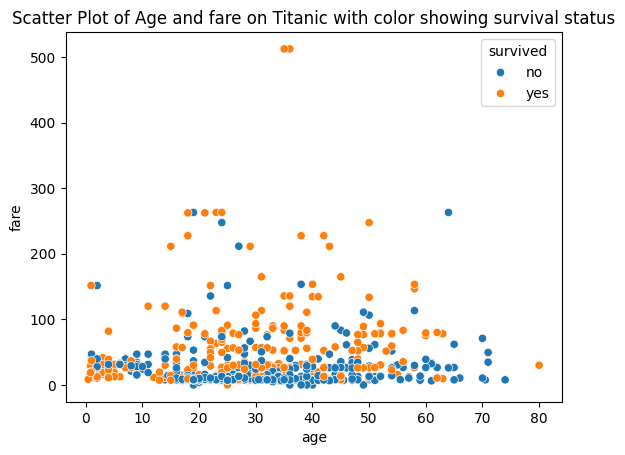

In [136]:
sns.scatterplot(x = 'age', y = 'fare', hue = 'survived', data = titanic_data)
plt.title('Scatter Plot of Age and fare on Titanic with color showing survival status')
plt.show()

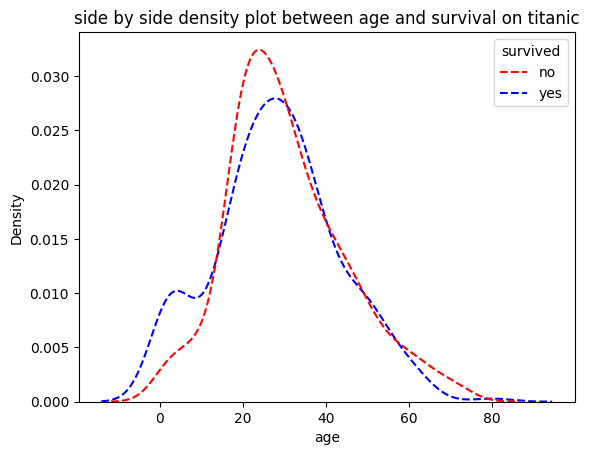

In [140]:
sns.kdeplot(x = 'age', hue = 'survived', data = titanic_data, common_norm = False, linestyle='--', palette=['red', 'blue'])
plt.title('side by side density plot between age and survival on titanic')
plt.show()

#### Other options

Matplotlib and seaborn also allow you to do some level of customization. 
Read the documents here to change color/size/shape for your plot. Save your work to submit to the quiz later. 

https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html


### Conclusion

- One categorical: bar plot
- One continous: histogram/density plot/boxplot
- Two continous: scatter plot
- One categorical and one continous: side-by-side boxplot
- Two categorical: side-by-side bar plot

But, wait, why?

In-class activities: discuss what other options you want to have for your plots?